## CS345 - MACHINE LEARNING COURSEWORK
Catalin Alexandru Mihalache 01.12.2021 986965

# IMPORTS

In [3]:
import tensorflow as tf
import skimage.feature
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPool2D
from keras.layers.core import Dense,Activation,Dropout,Flatten
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from keras.optimizers import adam
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans
import csv

# Loading data and getting info about it

In [4]:
np.set_printoptions(threshold=sys.maxsize)
train_images = np.load('trnImage.npy')
train_label_fine = np.load('trnLabel_fine.npy')
train_label_coarse = np.load('trnLabel_coarse.npy')
test_images = np.load('tstImage.npy')
test_label_fine = np.load('tstLabel_fine.npy')
test_label_coarse = np.load('tstLabel_coarse.npy')

print(f'Train Images Shape: {train_images.shape}')
print(f'Train Images Fine Labels Shape: {train_label_fine.shape}')
print(f'Train Images Coarse Labels Shape: {train_label_coarse.shape}')
print(f'Number of classes: {len(np.unique(train_label_fine))}')
print(f'Number of super classes: {len(np.unique(train_label_coarse))}')

print(f'Test Images Shape: {test_images.shape}')
print(f'Test Images Fine Labels Shape: {test_label_fine.shape}')
print(f'Test Images Coarse Labels Shape: {test_label_coarse.shape}')

#Transposing the 4d array to train and test the model
train_images_k = train_images
test_images_k = test_images
train_images = np.transpose(train_images, (3, 0, 1, 2))
test_images = np.transpose(test_images, (3, 0, 1, 2))

Train Images Shape: (32, 32, 3, 50000)
Train Images Fine Labels Shape: (50000,)
Train Images Coarse Labels Shape: (50000,)
Number of classes: 100
Number of super classes: 20
Test Images Shape: (32, 32, 3, 10000)
Test Images Fine Labels Shape: (10000,)
Test Images Coarse Labels Shape: (10000,)


# Defining methods

In [45]:
def openFile(filename):
    data = []
    file = filename + '.csv'
    with open(file, newline='') as File:  
        reader = csv.reader(File)
        for row in reader:
            data.append(row)
    
    return data

def confusion_matrix_generator(y_test, pred, labels):
    cm = confusion_matrix(y_test, pred)
    print(cm)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Confusion matrix of the classifier')
    fig.colorbar(cax)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

 # Create CNN Model for fine labels

In [8]:
# Create Model(CNN + Dropout)
model = Sequential()
 
model.add(Conv2D(128,kernel_size = (3,3), kernel_initializer='he_uniform', padding='valid',input_shape=(32, 32, 3)))
model.add(Activation('relu'))

model.add(Conv2D(128,kernel_size = (3,3), kernel_initializer='he_uniform', padding='valid'))
model.add(Activation('relu'))
model.add(MaxPool2D((3, 3), padding='valid'))
model.add(Dropout(0.5))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(100, activation='softmax'))

model.compile(optimizer= adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', patience = 3, verbose=1)

history = model.fit(train_images, train_label_fine, validation_data = (test_images, test_label_fine),
                    epochs=100, validation_split=0.2, verbose=1, callbacks = [es])


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 40s 796us/step - loss: 4.1087 - accuracy: 0.0841 - val_loss: 3.4004 - val_accuracy: 0.2123
Epoch 2/100
50000/50000 [==============================] - 39s 777us/step - loss: 3.2627 - accuracy: 0.2160 - val_loss: 2.7959 - val_accuracy: 0.3129
Epoch 3/100
50000/50000 [==============================] - 38s 764us/step - loss: 2.8789 - accuracy: 0.2874 - val_loss: 2.6076 - val_accuracy: 0.3544
Epoch 4/100
50000/50000 [==============================] - 38s 769us/step - loss: 2.6474 - accuracy: 0.3309 - val_loss: 2.4730 - val_accuracy: 0.3820
Epoch 5/100
50000/50000 [==============================] - 40s 794us/step - loss: 2.4794 - accuracy: 0.3634 - val_loss: 2.3902 - val_accuracy: 0.4000
Epoch 6/100
50000/50000 [==============================] - 39s 789us/step - loss: 2.3368 - accuracy: 0.3920 - val_loss: 2.3044 - val_accuracy: 0.4158
Epoch 7/100
50000/50000 [========================

# Printing the result for each fine label

In [9]:
fine_labels = openFile('fine_labels')


predict_x = model.predict(test_images)
classes_x = np.argmax(predict_x, axis = 1)

print(classification_report(test_label_fine, classes_x, target_names = fine_labels[0]))

               precision    recall  f1-score   support

       apples       0.73      0.73      0.73       100
aquarium fish       0.64      0.54      0.58       100
         baby       0.21      0.36      0.27       100
         bear       0.22      0.33      0.26       100
       beaver       0.28      0.24      0.26       100
          bed       0.41      0.30      0.35       100
          bee       0.40      0.48      0.44       100
       beetle       0.51      0.48      0.49       100
      bicycle       0.60      0.55      0.58       100
      bottles       0.60      0.59      0.60       100
        bowls       0.48      0.23      0.31       100
          boy       0.36      0.32      0.34       100
       bridge       0.40      0.46      0.43       100
          bus       0.40      0.49      0.44       100
    butterfly       0.42      0.31      0.36       100
        camel       0.41      0.35      0.38       100
         cans       0.49      0.41      0.45       100
       ca

# Ploatting the accuracy, loss curves and confusion matrix

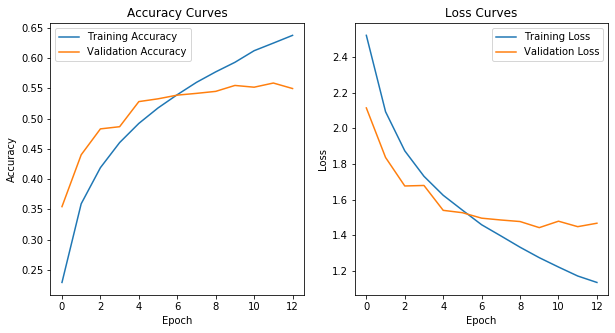

[[ 0  2  4  2 86  0  0  2  0  0  0  0  0  0  2  0  1  1  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 1 49  7  0 10  2  0  8  5  0  1  1  4  0  2  4  5  0  1  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [ 1  1  2  2  1  2  0  0  3  0  1  2  0  2 63  1 17  0  1  1  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0]
 [20  0  0  0  0  2  0  2 22  1  1 28 15  0  0  0  9  0  0  0  0  0

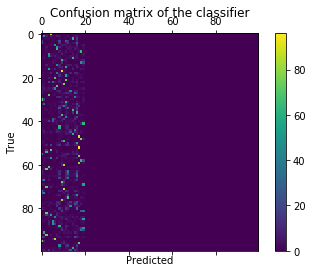

In [46]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

confusion_matrix_generator(test_label_fine, classes_x, fine_labels)

# Model results

In [18]:
test_results = model.evaluate(test_images, test_label_fine)

print(f'Test set loss: {test_results[0]:0.2f}, test set accuracy: {test_results[1]*100:0.2f}%')

10000/10000 [==============================] - 2s 172us/step
Test set loss: 2.21, test set accuracy: 43.57%


# Create CNN Model for coarse labels

In [19]:
# Create Model(CNN + Dropout)
model = Sequential()
 
model.add(Conv2D(256,kernel_size = (3,3), kernel_initializer='he_uniform', padding='valid',input_shape=(32, 32, 3)))
model.add(Activation('relu'))

model.add(Conv2D(256,kernel_size = (3,3), kernel_initializer='he_uniform', padding='valid'))
model.add(Activation('relu'))
model.add(MaxPool2D((3, 3), padding='valid'))
model.add(Dropout(0.5))
 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))

model.compile(optimizer= adam(), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# simple early stopping
es = EarlyStopping(monitor='val_loss', mode='min', patience = 3, verbose=1)

history = model.fit(train_images, train_label_coarse, validation_data = (test_images, test_label_coarse),
                    epochs=100, validation_split=0.2, verbose=1, callbacks = [es])

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 77s 2ms/step - loss: 2.5218 - accuracy: 0.2291 - val_loss: 2.1143 - val_accuracy: 0.3544
Epoch 2/100
50000/50000 [==============================] - 77s 2ms/step - loss: 2.0931 - accuracy: 0.3591 - val_loss: 1.8362 - val_accuracy: 0.4401
Epoch 3/100
50000/50000 [==============================] - 77s 2ms/step - loss: 1.8735 - accuracy: 0.4188 - val_loss: 1.6762 - val_accuracy: 0.4829
Epoch 4/100
50000/50000 [==============================] - 77s 2ms/step - loss: 1.7304 - accuracy: 0.4603 - val_loss: 1.6790 - val_accuracy: 0.4865
Epoch 5/100
50000/50000 [==============================] - 77s 2ms/step - loss: 1.6240 - accuracy: 0.4919 - val_loss: 1.5394 - val_accuracy: 0.5280
Epoch 6/100
50000/50000 [==============================] - 77s 2ms/step - loss: 1.5404 - accuracy: 0.5175 - val_loss: 1.5262 - val_accuracy: 0.5326
Epoch 7/100
50000/50000 [==============================] - 78s

# Printing the result for each coarse class

In [20]:
coarse_labels = openFile('coarse_labels')
        
predict_x = model.predict(test_images)
classes_x = np.argmax(predict_x, axis = 1)

print(classification_report(test_label_coarse, classes_x, target_names = coarse_labels[0]))

                                precision    recall  f1-score   support

               aquatic mammals       0.44      0.47      0.46       500
                          fish       0.58      0.44      0.50       500
                       flowers       0.76      0.73      0.74       500
               food containers       0.64      0.61      0.63       500
          fruit and vegetables       0.70      0.56      0.62       500
  household electrical devices       0.67      0.39      0.49       500
           household furniture       0.70      0.59      0.64       500
                       insects       0.58      0.55      0.56       500
              large carnivores       0.40      0.51      0.44       500
 large man-made outdoor things       0.54      0.76      0.63       500
  large natural outdoor scenes       0.65      0.71      0.68       500
large omnivores and herbivores       0.42      0.59      0.49       500
          medium-sized mammals       0.39      0.40      0.39  

# Ploatting the accuracy, loss curves and confusion matrix

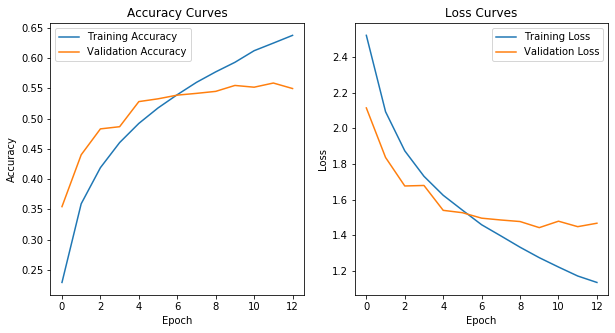

[[237  32   0   5   1   4   0   4  24  16  16  29  30   8  13  23  47   5
    0   6]
 [ 55 219   9  10  11   3   4  11   9   9  23  19  16   7  10  25  45   7
    2   6]
 [  1   7 363   9  31   1   2  25   5   2   5   5   4   5  13   5  11   5
    1   0]
 [  4   9   4 306  14  15  20   7   8  17   5   6   6  10  25   3  18   1
    7  15]
 [  4  10  43  12 280   0   3  31  16   3   4  18  13   7  10  11  26   7
    0   2]
 [ 11  10   8  54   5 194  40   6  20  24  18  10   6  11  21  19  13   4
   12  14]
 [  7   9   4  19   7  24 293   5   8  21  11  11   8   7  11   3  19   4
   11  18]
 [ 12   5  16   4  11   3   2 276  23   9   5  11  16  27   4  30  30   6
    1   9]
 [ 29   1   1   3   0   4   3   5 253   6   7  64  52   4   7  11  45   3
    0   2]
 [  7   1   0   1   0   5   4   0   5 380  37  16   4   0   4   4   2   7
    8  15]
 [  8   8   0   3   2   3   4   1  11  50 353  13   2   4   4   3  11  16
    1   3]
 [ 15   0   1   2   2   0   5   2  44  24   5 294  26   2   8   9

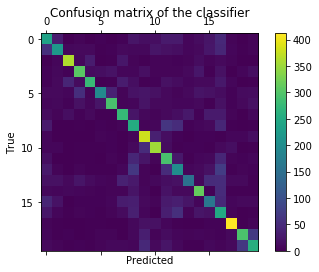

In [47]:
plt.figure(figsize=[10,5])
plt.subplot(121)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy',
           'Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(122)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss',
           'Validation Loss'])
plt.title('Loss Curves')
plt.show()

confusion_matrix_generator(test_label_coarse, classes_x, coarse_labels)

# Model results

In [25]:
test_results = model.evaluate(test_images, test_label_coarse)

print(f'Test set loss: {test_results[0]:0.2f}, test set accuracy: {test_results[1]*100:0.2f}%')

10000/10000 [==============================] - 3s 334us/step
Test set loss: 1.47, test set accuracy: 54.96%


## K-means algorithm for fine labels

In [9]:
# Getting the data
train_num_images = train_images_k[0,0,0,:].size
train_hog_features = np.zeros((train_num_images, 324))
for i in range(0, train_num_images, 1):
    train_hog_features[i] = skimage.feature.hog(train_images_k[:,:,:,i], visualize=False, block_norm='L2-Hys')
    
# Getting the features
test_num_images = test_images_k[0,0,0,:].size
test_hog_features = np.zeros((test_num_images, 324))
for i in range(0, test_num_images, 1):
    test_hog_features[i] = skimage.feature.hog(test_images_k[:,:,:,i], visualize=False, block_norm='L2-Hys')
    
#K-means
kmeans = KMeans(n_clusters=10)
kmeans.fit(train_hog_features)

test_pred = kmeans.predict(test_hog_features)

accuracy = np.sum(np.equal(test_label_fine, test_pred)) / test_label_fine.shape[0] * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

Percentage accuracy on testing set is: 0.62%


## K-means algorithm for coarse labels

In [8]:
# Getting the data
train_num_images = train_images_k[0,0,0,:].size
train_hog_features = np.zeros((train_num_images, 324))
for i in range(0, train_num_images, 1):
    train_hog_features[i] = skimage.feature.hog(train_images_k[:,:,:,i], visualize=False, block_norm='L2-Hys')
    
# Getting the features
test_num_images = test_images_k[0,0,0,:].size
test_hog_features = np.zeros((test_num_images, 324))
for i in range(0, test_num_images, 1):
    test_hog_features[i] = skimage.feature.hog(test_images_k[:,:,:,i], visualize=False, block_norm='L2-Hys')
    
#K-means
kmeans = KMeans(n_clusters=20)
kmeans.fit(train_hog_features)

test_pred = kmeans.predict(test_hog_features)

accuracy = np.sum(np.equal(test_label_coarse, test_pred)) / test_label_coarse.shape[0] * 100
print('Percentage accuracy on testing set is: {0:.2f}%'.format(accuracy))

Percentage accuracy on testing set is: 7.07%
